In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
import sys
sys.path.insert(0, '..')

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['font.size'] = 16
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')

import covid19

In [3]:
data = pd.read_csv('covid-19-it-protezione-civile.csv', parse_dates=['date'], index_col=['date'])
data['total_cases'] = data['cases'] + data['deaths'] + data['healed']

data

,cases,deaths,healed,critical,severe,total_cases
date,,,,,,
2020-02-21 16:00:00,19,1,0,0,0,20
2020-02-22 16:00:00,74,2,0,0,0,76
2020-02-23 16:00:00,149,3,0,0,0,152
2020-02-24 16:00:00,222,7,0,27,101,229
2020-02-25 16:00:00,311,10,1,35,114,322
2020-02-26 16:00:00,385,12,3,36,128,400
2020-02-27 16:00:00,588,17,45,56,248,650
2020-02-28 16:00:00,821,21,46,64,345,888
2020-02-29 16:00:00,1049,29,50,105,401,1128


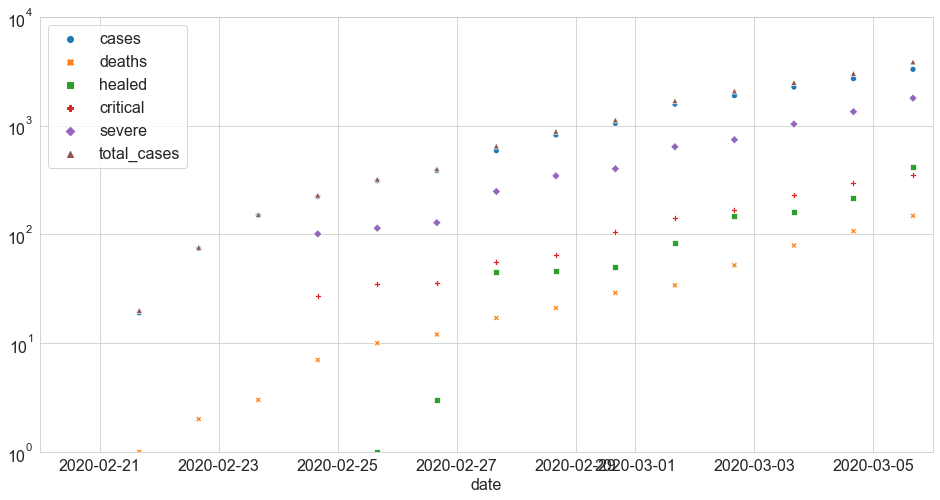

In [4]:
import numpy as np

ax = sns.scatterplot(data=data)
_ = ax.set(yscale='log')
_ = ax.set(ylim=(1, 10000))
_ = ax.set(xlim=(np.datetime64('2020-02-20'), np.datetime64('2020-03-06')))


In [16]:
deaths_fit = covid19.fit.ExponentialFit.from_frame('deaths', data, start_fit='2020-02-24')
print(deaths_fit)
deaths_fit

t_0='2020-02-18T10:12:59', dt_days=2.28, start_fit='2020-02-24', stop_fit=None


ExponentialFit(t_0=numpy.datetime64('2020-02-18T10:12:59'), dt=numpy.timedelta64(197240,'s'), start_fit='2020-02-24', stop_fit=None)

In [14]:
deaths_fit.predict(pd.date_range('2020-02-20T16:00', '2020-03-07').values)

array([  1.97472505,   2.67529283,   3.62439913,   4.91021725,
         6.65220155,   9.01218483,  12.20941289,  16.54091278,
        22.40908699,  30.35909724,  41.12951081,  55.72091443,
        75.48887025, 102.26984947, 138.55184315, 187.70550012])